In [30]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
# Đọc dữ liệu
df = pd.read_csv("iris.csv")

# Hiển thị 5 dòng đầu tiên
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:

# Kiểm tra thông tin dữ liệu
df.info()

# Kiểm tra giá trị thiếu
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [3]:

# Thống kê các đặc trưng
df.describe()

# Kiểm tra số lượng mẫu theo từng chủng loài
df['Species'].value_counts()


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

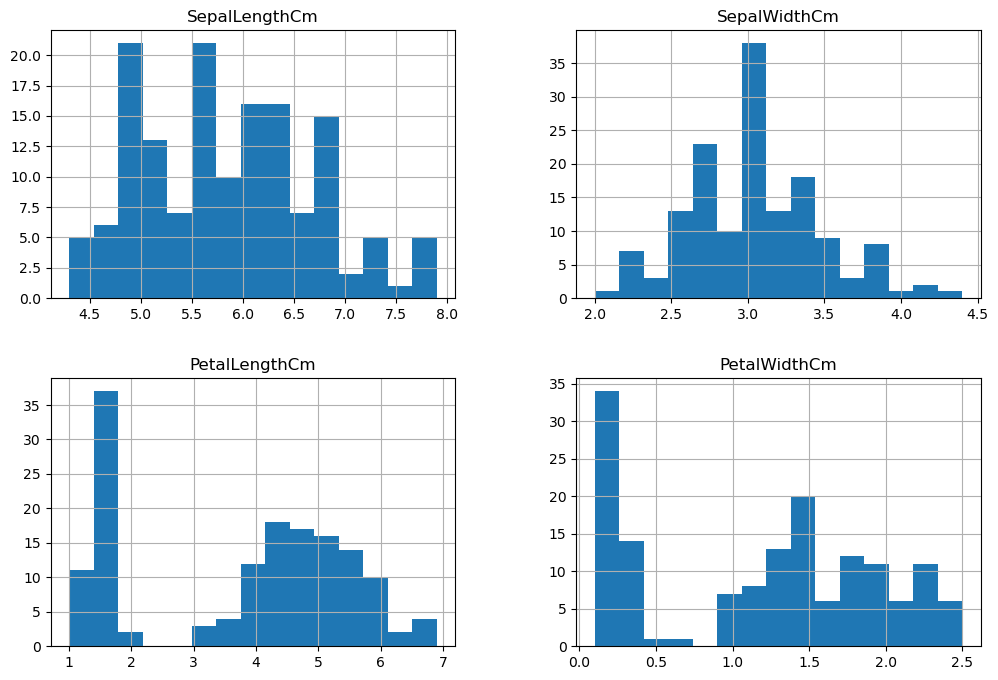

In [4]:

# Trực quan hóa phân phối các đặc trưng
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
df[features].hist(figsize=(12, 8), bins=15)
plt.show()


# 2. Tập dữ liệu sử dụng tỉ lệ train:test là 75:25 với hệ số ngẫu nhiên là 16 

In [5]:

# Chia dữ liệu thành tập train (75%) và test (25%)
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = df["Species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 3. Sử dụng biểu đồ để tìm giá trị K tốt nhất cho mô hình K-NN dựa theo độ đo chính xác để đánh giá. 

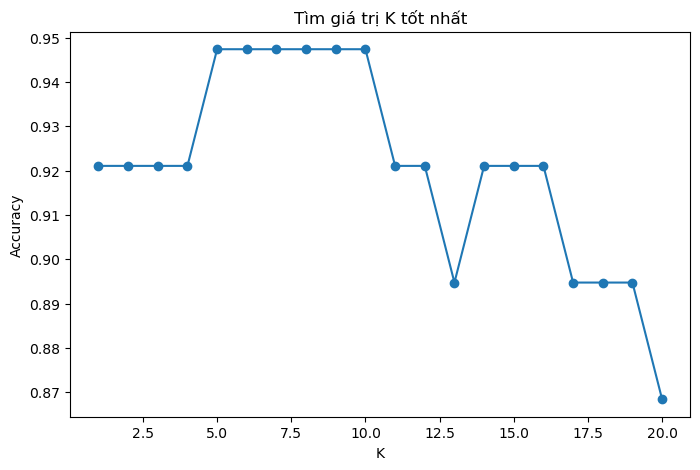

5

In [6]:

# Tìm giá trị K tối ưu bằng cách kiểm tra độ chính xác
accuracy_scores = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Vẽ biểu đồ độ chính xác theo giá trị K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Tìm giá trị K tốt nhất")
plt.show()

# Chọn giá trị K tốt nhất
best_k = k_values[np.argmax(accuracy_scores)]
best_k


# 4. Sử dụng giá trị K tốt nhất để xây dựng mô hình

In [9]:
# Huấn luyện mô hình với K tối ưu
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

# 5. Cho biết độ đo chính xác (accuracy) trên tập dữ liệu đánh giá (test data set) 

In [10]:
print("Độ chính xác:", knn.score(X_train, y_train))
print("Độ chính xác:", knn.score(X_test, y_test))

Độ chính xác: 0.9732142857142857
Độ chính xác: 0.9473684210526315


# 6. Xây dựng ma trận confusion matrix của mô hình trên tập dữ liệu test


In [21]:
y_test_predicted = knn.predict(X_test) 
y_test_predicted

array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [30]:
# Ma trận nhầm lẫn
cfmx = confusion_matrix(y_test, y_test_predicted) 
print(cfmx) 
# tn, fp, fn, tp  = confusion_matrix(y_test, y_test_predicted).ravel() 
# print(f'{tn}, {fp}, {fn}, {tp}')

[[13  0  0]
 [ 0 15  0]
 [ 0  2  8]]


In [7]:



# Dự đoán trên tập test
y_pred = knn.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình: {accuracy:.4f}")

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Báo cáo phân loại
print("Classification Report:")
print(classification_report(y_test, y_pred))


Độ chính xác của mô hình: 0.9474
Confusion Matrix:
[[13  0  0]
 [ 0 15  0]
 [ 0  2  8]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.95        38
      macro avg       0.96      0.93      0.94        38
   weighted avg       0.95      0.95      0.95        38



In [20]:
y_pred_test_new_065 = (knn.predict_proba(X_test) [:, 1] >= 0.65).astype(float)
y_pred_test_new_065 

array([1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1.])

# 7. Với chủng loại: Iris-setosa 
 a. Hãy cho biết các giá trị: [tn, fp, fn, tp], [TPR, FNR, FPR, TNR], [precision, recal,  F1] 

 
b. Vẽ đồ thị AUC & ROC 

In [31]:
print(classification_report(y_test, y_test_predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.95        38
      macro avg       0.96      0.93      0.94        38
   weighted avg       0.95      0.95      0.95        38



In [43]:
#  a. Hãy cho biết các giá trị: [tn, fp, fn, tp], [TPR, FNR, FPR, TNR], [precision, recal,  F1] 
# Cell 9: Tính các chỉ số cho chủng loại Iris-setosa

# Với bài toán đa lớp, chuyển sang bài toán nhị phân cho Iris-setosa vs. còn lại
# Tạo biến nhị phân: 1 nếu là Iris-setosa, 0 nếu không
y_test_bin = (y_test == 'Iris-setosa').astype(int)
y_pred_bin = (y_pred == 'Iris-setosa').astype(int)

# Tính confusion matrix nhị phân
cm_bin = confusion_matrix(y_test_bin, y_pred_bin)
tn, fp, fn, tp = cm_bin.ravel()
print("Confusion Matrix (Iris-setosa vs Rest):")
print(cm_bin)
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

# Tính các chỉ số
TPR = tp / (tp + fn) if (tp+fn)!=0 else 0  # Recall/Sensitivity
FNR = fn / (tp + fn) if (tp+fn)!=0 else 0
FPR = fp / (fp + tn) if (fp+tn)!=0 else 0
TNR = tn / (fp + tn) if (fp+tn)!=0 else 0

precision = precision_score(y_test_bin, y_pred_bin, zero_division=0)
recall = TPR  # như trên
f1 = f1_score(y_test_bin, y_pred_bin, zero_division=0)

print("\nCác chỉ số cho chủng loại Iris-setosa:")
print(f"TPR (Recall): {TPR:.4f}")
print(f"FNR: {FNR:.4f}")
print(f"FPR: {FPR:.4f}")
print(f"TNR: {TNR:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



Confusion Matrix (Iris-setosa vs Rest):
[[25  0]
 [ 0 13]]
TN: 25, FP: 0, FN: 0, TP: 13

Các chỉ số cho chủng loại Iris-setosa:
TPR (Recall): 1.0000
FNR: 0.0000
FPR: 0.0000
TNR: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


AUC cho Iris-setosa: 1.0000


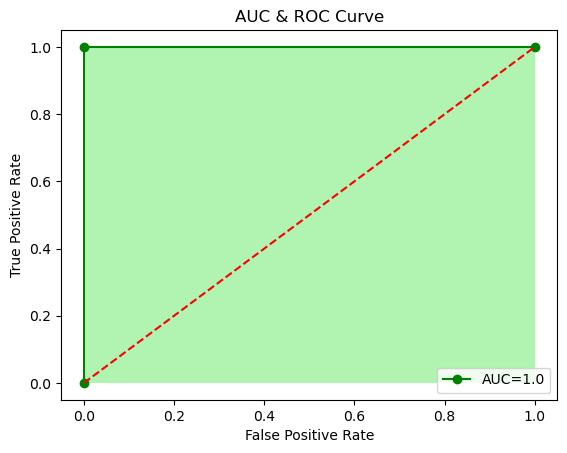

In [50]:
# Cell 10: Vẽ đồ thị ROC & tính AUC cho chủng loại Iris-setosa
from sklearn import metrics 
# Dự báo xác suất cho tập test (cho lớp Iris-setosa)
y_prob = knn.predict_proba(X_test)[:, list(knn.classes_).index('Iris-setosa')]

# Tính ROC curve

roc_auc = auc(fpr, tpr)

print(f"AUC cho Iris-setosa: {roc_auc:.4f}")

# Vẽ đồ thị ROC
y_pred_proba  = (knn.predict_proba (X_test) [:, 1] >= 0.65).astype(float) 
fpr, tpr, thresholds = roc_curve(y_test_bin, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'go-', label="AUC="+str(roc_auc)) 
plt.plot([0,1], [0,1], 'r--') 
plt.title("AUC & ROC Curve") 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.fill_between (fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.show()

In [46]:

import joblib

# Lưu mô hình
joblib.dump(knn, "iris_knn.pkl")

# Lưu bộ chuẩn hóa
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [31]:

# Hàm dự đoán chủng loài
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    model = joblib.load("iris_knn.pkl")
    scaler = joblib.load("scaler.pkl")
    sample = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    sample = scaler.transform(sample)
    prediction = model.predict(sample)
    return prediction[0]

# Dự đoán với một mẫu cụ thể
sample_prediction = predict_species(4.5, 2.7, 2.0, 0.24)
print(f"Dự đoán chủng loại: {sample_prediction}")


Dự đoán chủng loại: Iris-setosa


d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
